<a href="https://colab.research.google.com/github/Anik-1802021/Machine_Learning/blob/main/Denoise_ipmb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install bm3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00


<ipython-input-2-3eecef91725b>:18: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=False))
<ipython-input-2-3eecef91725b>:50: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  wavelet_denoised = denoise_wavelet(noisy_image, multichannel=False)
<ipython-input-2-3eecef91725b>:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


BM3D:
  MSE: 0.0010377575775501959
  PSNR: 29.839040867846908
  CNR: 13.402073174553944
  SSIM: 0.8426024369009463
Bilateral:
  MSE: 2724.5969594363646
  PSNR: -34.35302267626038
  CNR: -47.598095593512326
  SSIM: 5.357388231399474e-05
Non-local Means:
  MSE: 0.0012124338564615416
  PSNR: 29.16341944731727
  CNR: 12.732435852126516
  SSIM: 0.8240400674089998
Wiener:
  MSE: 0.0027170402849952206
  PSNR: 25.659039223397734
  CNR: 9.095353540422344
  SSIM: 0.7985291342060582
Gaussian:
  MSE: 2770.5910019881753
  PSNR: -34.42572419434469
  CNR: -47.64754932417716
  SSIM: 3.3504974729393014e-05
Average:
  MSE: 2694.8675427456074
  PSNR: -34.305374237459915
  CNR: -47.38896905011415
  SSIM: 3.268796781249609e-05
Median:


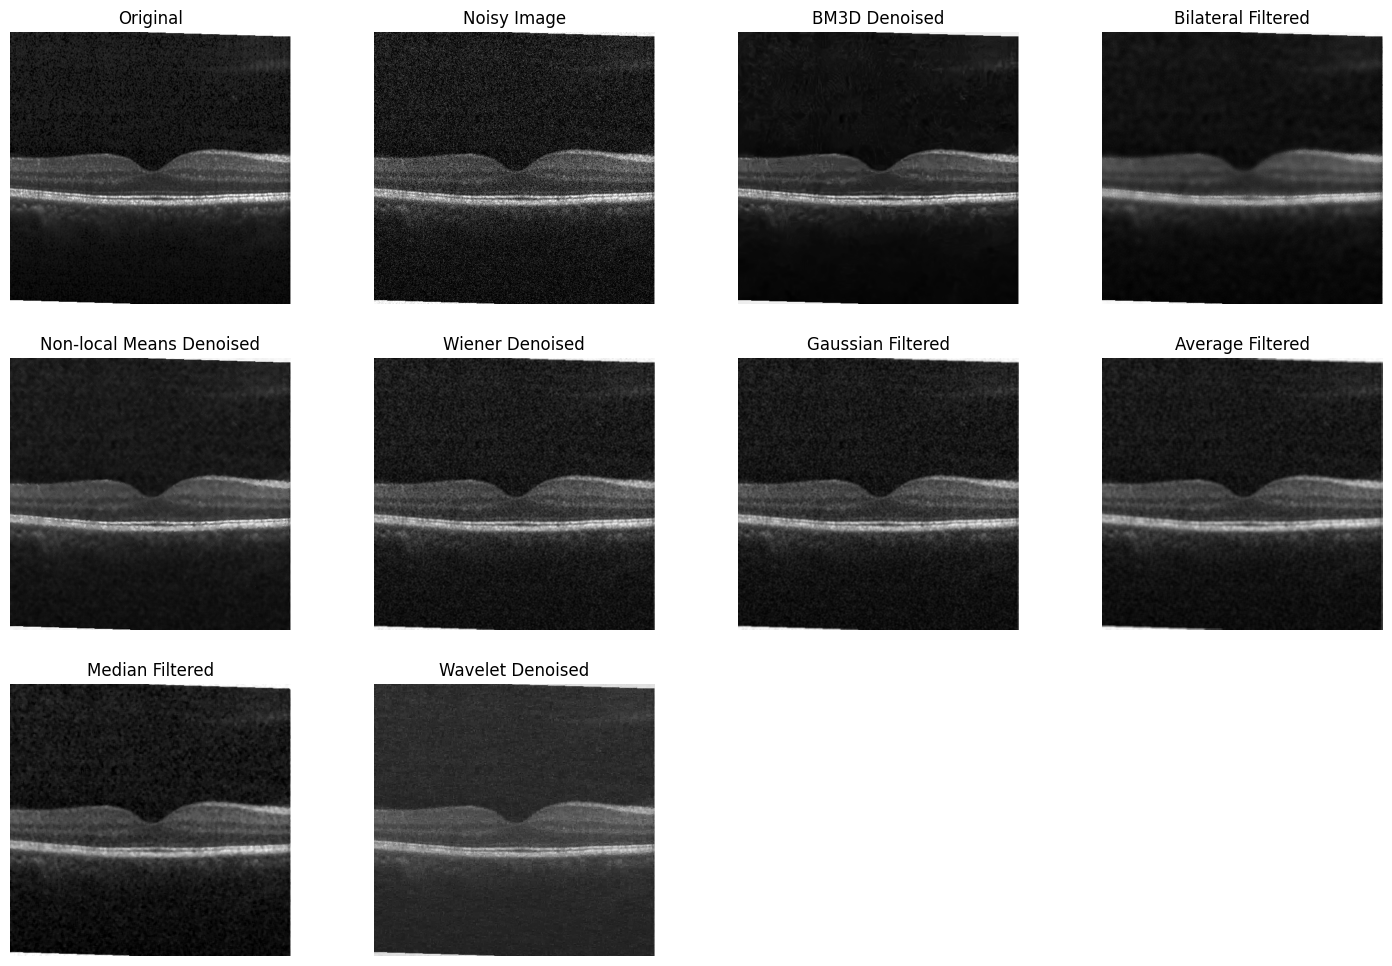

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from skimage.util import random_noise
import bm3d

# Read the image
img = cv2.imread('oct_image.png', cv2.IMREAD_GRAYSCALE)
original = img.astype(np.float64) / 255.0

# Add noise to the image
sigma = 0.1
noisy_image = random_noise(original, var=sigma**2)

# Estimate the noise standard deviation
sigma_est = np.mean(estimate_sigma(noisy_image, multichannel=False))

# BM3D denoising
bm3d_denoised = bm3d.bm3d(noisy_image, sigma_psd=sigma_est)

# Convert the noisy image to uint8
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)

# Bilateral filtering
bilateral_filtered = cv2.bilateralFilter(noisy_image_uint8, d=15, sigmaColor=75, sigmaSpace=75)

# Non-local means denoising
nl_means_denoised = denoise_nl_means(noisy_image, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Wiener filtering
# Define the Wiener filter kernel
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)

# Apply Wiener filter
wiener_denoised = cv2.filter2D(noisy_image, -1, kernel)

# Gaussian filtering
gaussian_filtered = cv2.GaussianBlur(noisy_image_uint8, (5, 5), 0)

# Average filtering
average_filtered = cv2.blur(noisy_image_uint8, (5, 5))

# Median filtering
median_filtered = cv2.medianBlur(noisy_image_uint8, 5)

# Wavelet denoising
wavelet_denoised = denoise_wavelet(noisy_image, multichannel=False)

# Displaying Results
plt.figure(figsize=(18, 12))

plt.subplot(3, 4, 1)
plt.imshow(original, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(bm3d_denoised, cmap='gray')
plt.title('BM3D Denoised')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(nl_means_denoised, cmap='gray')
plt.title('Non-local Means Denoised')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(wiener_denoised, cmap='gray')
plt.title('Wiener Denoised')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(average_filtered, cmap='gray')
plt.title('Average Filtered')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(wavelet_denoised, cmap='gray')
plt.title('Wavelet Denoised')
plt.axis('off')

# Calculate MSE, PSNR, CNR, and SSIM for each denoised image
def calculate_metrics(original, denoised):
    mse = mean_squared_error(original, denoised)
    psnr = peak_signal_noise_ratio(original, denoised)
    cnr = 20 * np.log10(np.mean(original) / np.std(original - denoised))
    ssim = structural_similarity(original, denoised)
    return mse, psnr, cnr, ssim

# BM3D metrics
mse_bm3d, psnr_bm3d, cnr_bm3d, ssim_bm3d = calculate_metrics(original, bm3d_denoised)

# Bilateral filtering metrics
mse_bilateral, psnr_bilateral, cnr_bilateral, ssim_bilateral = calculate_metrics(original, bilateral_filtered)

# Non-local means metrics
mse_nl_means, psnr_nl_means, cnr_nl_means, ssim_nl_means = calculate_metrics(original, nl_means_denoised)

# Wiener filtering metrics
mse_wiener, psnr_wiener, cnr_wiener, ssim_wiener = calculate_metrics(original, wiener_denoised)

# Gaussian filtering metrics
mse_gaussian, psnr_gaussian, cnr_gaussian, ssim_gaussian = calculate_metrics(original, gaussian_filtered)

# Average filtering metrics
mse_average, psnr_average, cnr_average, ssim_average = calculate_metrics(original, average_filtered)

# Median filtering metrics
mse_median, psnr_median, cnr_median, ssim_median = calculate_metrics(original, median_filtered)

# Wavelet denoising metrics
mse_wavelet, psnr_wavelet, cnr_wavelet, ssim_wavelet = calculate_metrics(original, wavelet_denoised)

# Displaying the calculated metrics
print("BM3D:")
print("  MSE:", mse_bm3d)
print("  PSNR:", psnr_bm3d)
print("  CNR:", cnr_bm3d)
print("  SSIM:", ssim_bm3d)
print("Bilateral:")
print("  MSE:", mse_bilateral)
print("  PSNR:", psnr_bilateral)
print("  CNR:", cnr_bilateral)
print("  SSIM:", ssim_bilateral)
print("Non-local Means:")
print("  MSE:", mse_nl_means)
print("  PSNR:", psnr_nl_means)
print("  CNR:", cnr_nl_means)
print("  SSIM:", ssim_nl_means)
print("Wiener:")
print("  MSE:", mse_wiener)
print("  PSNR:", psnr_wiener)
print("  CNR:", cnr_wiener)
print("  SSIM:", ssim_wiener)
print("Gaussian:")
print("  MSE:", mse_gaussian)
print("  PSNR:", psnr_gaussian)
print("  CNR:", cnr_gaussian)
print("  SSIM:", ssim_gaussian)
print("Average:")
print("  MSE:", mse_average)
print("  PSNR:", psnr_average)
print("  CNR:", cnr_average)
print("  SSIM:", ssim_average)
print("Median:")
